In [40]:
import numpy as np
import pandas as pd
from os import listdir
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [41]:
# X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# plt.scatter(X[:,0], X[:,1])

#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples=400, centers=centers, 
                  cluster_std=0.5, random_state=0)
#Normalize the values
X = StandardScaler().fit_transform(X)

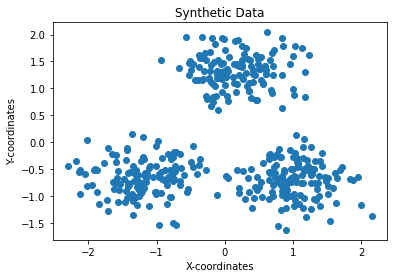

In [80]:
plt.figure()
plt.title('Synthetic Data')
plt.xlabel('X-coordinates')
plt.ylabel('Y-coordinates')
plt.scatter(X[:,0], X[:,1])
plt.savefig('sampledata.jpg', dpi=300, transparent=False, bbox_inches='tight')

In [52]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

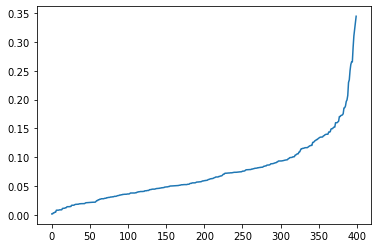

In [53]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

0.2652665422531757


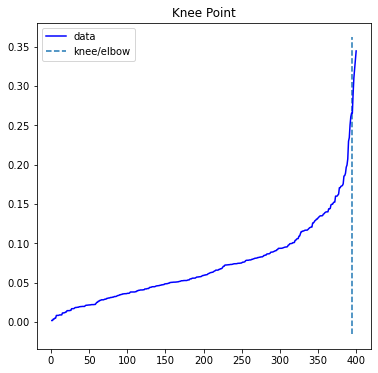

In [54]:
kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                      distances, # y values
                      S=1.0, #parameter suggested from paper
                      curve="concave", #parameter from figure
                      direction="increasing", #parameter from figure
                      online=True
                     ) 

kneedle.plot_knee()
print(kneedle.knee_y)
epsilon = kneedle.knee_y

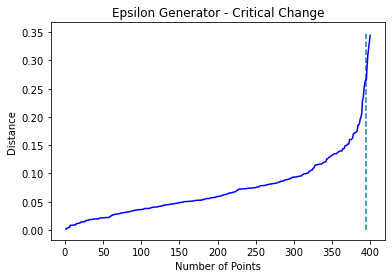

In [81]:
plt.figure()
plt.title('Epsilon Generator - Critical Change')
plt.xlabel('Number of Points')
plt.ylabel('Distance')
plt.plot(kneedle.x, kneedle.y, color='blue')
plt.vlines(kneedle.knee, 0, 0.35, linestyles="--",)
plt.savefig('kneedle.jpg', dpi=300, transparent=False, bbox_inches='tight')
# plt.plot(kneedle.x_difference, kneedle.y_difference)

In [74]:
m = DBSCAN(eps=epsilon, min_samples=5)
m.fit(X)

DBSCAN(eps=0.2652665422531757)

In [75]:
clusters = m.labels_

In [76]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

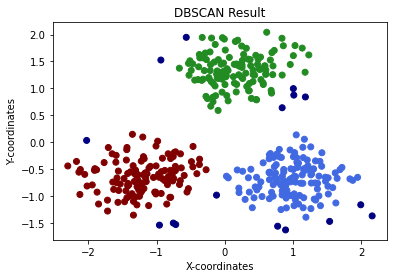

In [82]:
plt.figure()
plt.title('DBSCAN Result')
plt.xlabel('X-coordinates')
plt.ylabel('Y-coordinates')
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))
plt.savefig('DBSCAN_clusterd.jpg', dpi=300, transparent=False, bbox_inches='tight')